Sandra Rojas Zegarrundo GU3030768

**Comparação de Algoritmos de Classificação KNN e Naive Bayes com o Conjunto de Dados Wine**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.datasets import load_wine

In [3]:
wine= load_wine()

In [4]:
wine.feature_names

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

In [5]:
wine.target_names

array(['class_0', 'class_1', 'class_2'], dtype='<U7')

In [7]:
wine_data = np.c_[wine.data, wine.target]

In [8]:
df_wine = pd.DataFrame(data = wine_data, columns=wine['feature_names'] +['target'])

In [9]:
df_wine.head()

alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    14.23        1.71  2.43               15.6      127.0           2.80   
1    13.20        1.78  2.14               11.2      100.0           2.65   
2    13.16        2.36  2.67               18.6      101.0           2.80   
3    14.37        1.95  2.50               16.8      113.0           3.85   
4    13.24        2.59  2.87               21.0      118.0           2.80   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   od280/od315_of_diluted_wines  proline  target  
0                          3.92   1065.0     0.0  
1                          3.40   1050.0     0.0  
2                          3.17   1185.0     0.0  
3                          3.45   1480.0     0.0  
4                          2.93    735.0     0.0

In [11]:
df_wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
 13  targe

In [12]:
df_wine.nunique()

alcohol                         126
malic_acid                      133
ash                              79
alcalinity_of_ash                63
magnesium                        53
total_phenols                    97
flavanoids                      132
nonflavanoid_phenols             39
proanthocyanins                 101
color_intensity                 132
hue                              78
od280/od315_of_diluted_wines    122
proline                         121
target                            3
dtype: int64

In [14]:
df_wine.isnull().sum()

alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
target                          0
dtype: int64

In [15]:
df_wine.describe()

alcohol  malic_acid         ash  alcalinity_of_ash   magnesium  \
count  178.000000  178.000000  178.000000         178.000000  178.000000   
mean    13.000618    2.336348    2.366517          19.494944   99.741573   
std      0.811827    1.117146    0.274344           3.339564   14.282484   
min     11.030000    0.740000    1.360000          10.600000   70.000000   
25%     12.362500    1.602500    2.210000          17.200000   88.000000   
50%     13.050000    1.865000    2.360000          19.500000   98.000000   
75%     13.677500    3.082500    2.557500          21.500000  107.000000   
max     14.830000    5.800000    3.230000          30.000000  162.000000   

       total_phenols  flavanoids  nonflavanoid_phenols  proanthocyanins  \
count     178.000000  178.000000            178.000000       178.000000   
mean        2.295112    2.029270              0.361854         1.590899   
std         0.625851    0.998859              0.124453         0.572359   
min         0.980000    0.340000              0.130000         0.410000   
25%         1.742500    1.205000              0.270000         1.250000   
50%         2.355000    2.135000              0.340000         1.555000   
75%         2.800000    2.875000              0.437500         1.950000   
max         3.880000    5.080000              0.660000         3.580000   

       color_intensity         hue  od280/od315_of_diluted_wines      proline  \
count       178.000000  178.000000                    178.000000   178.000000   
mean          5.058090    0.957449                      2.611685   746.893258   
std           2.318286    0.228572                      0.709990   314.907474   
min           1.280000    0.480000                      1.270000   278.000000   
25%           3.220000    0.782500                      1.937500   500.500000   
50%           4.690000    0.965000                      2.780000   673.500000   
75%           6.200000    1.120000                      3.170000   985.000000   
max          13.000000    1.710000                      4.000000  1680.000000   

           target  
count  178.000000  
mean     0.938202  
std      0.775035  
min      0.000000  
25%      0.000000  
50%      1.000000  
75%      2.000000  
max      2.000000

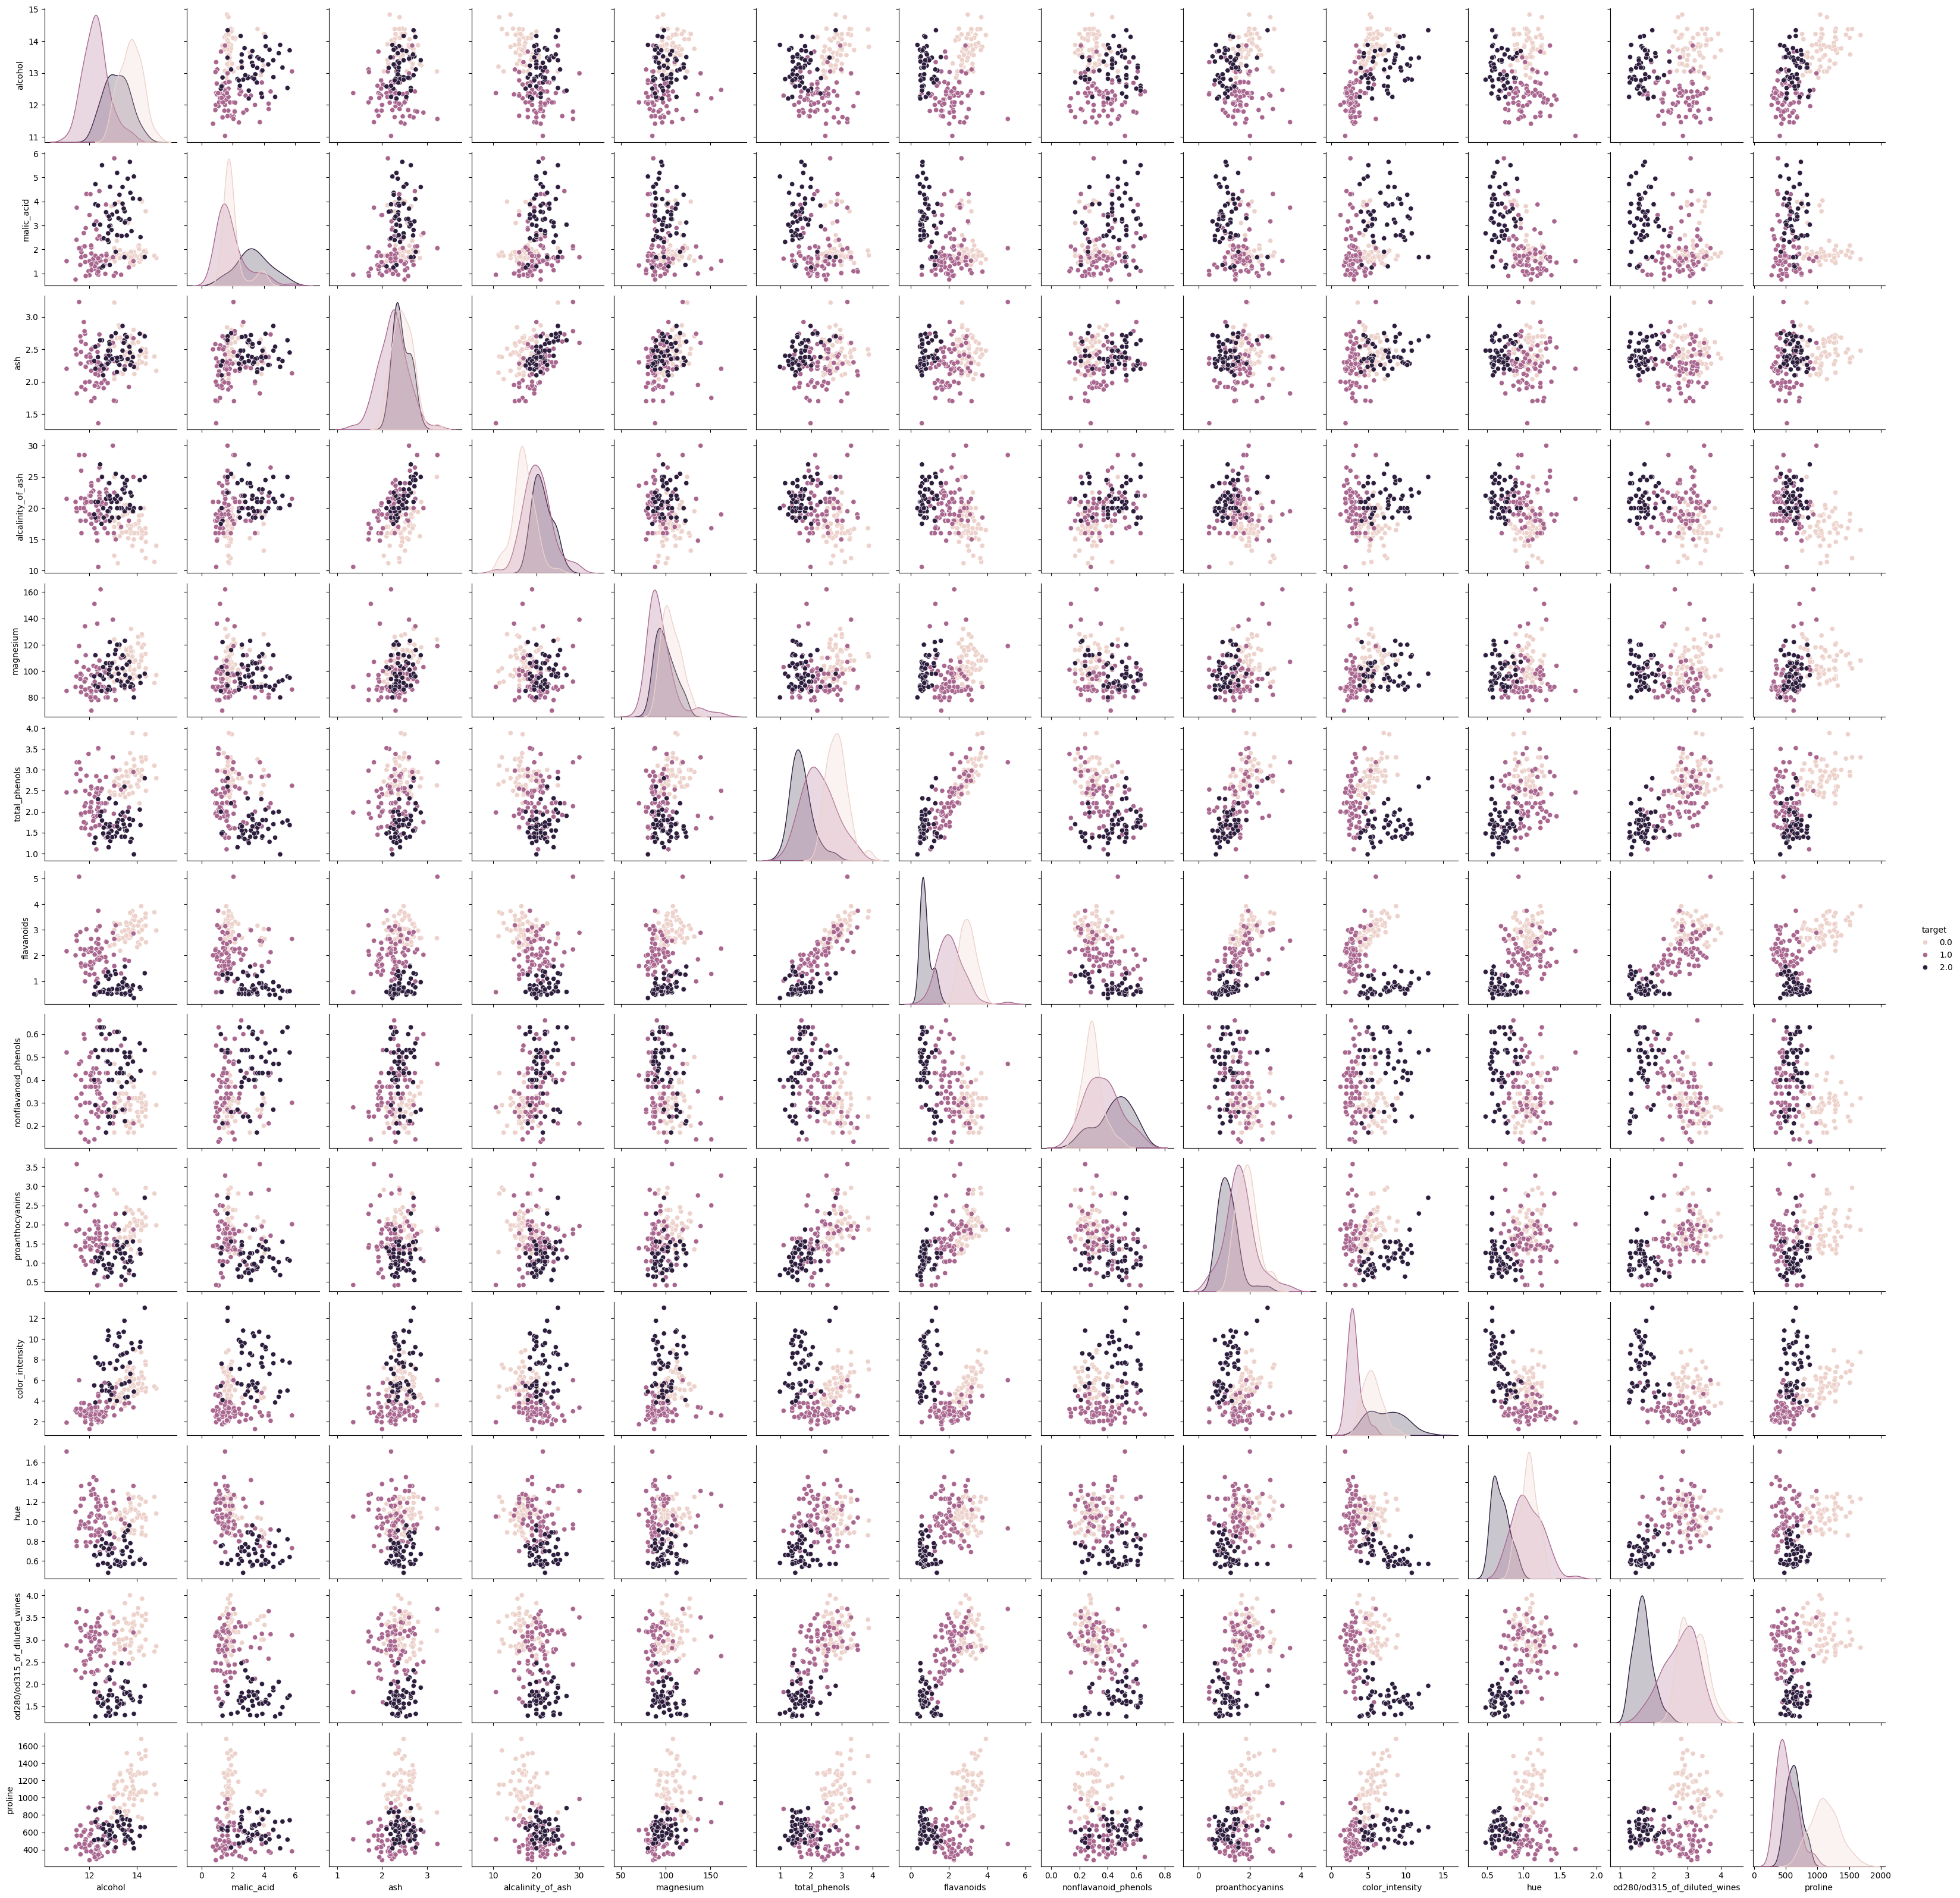

In [17]:
sns.pairplot(df_wine, hue='target')

<Axes: xlabel='target', ylabel='count'>

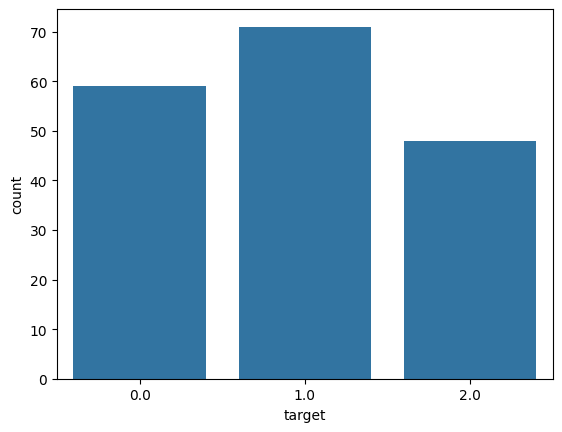

In [18]:
sns.countplot(x='target',data=df_wine)

<Axes: >

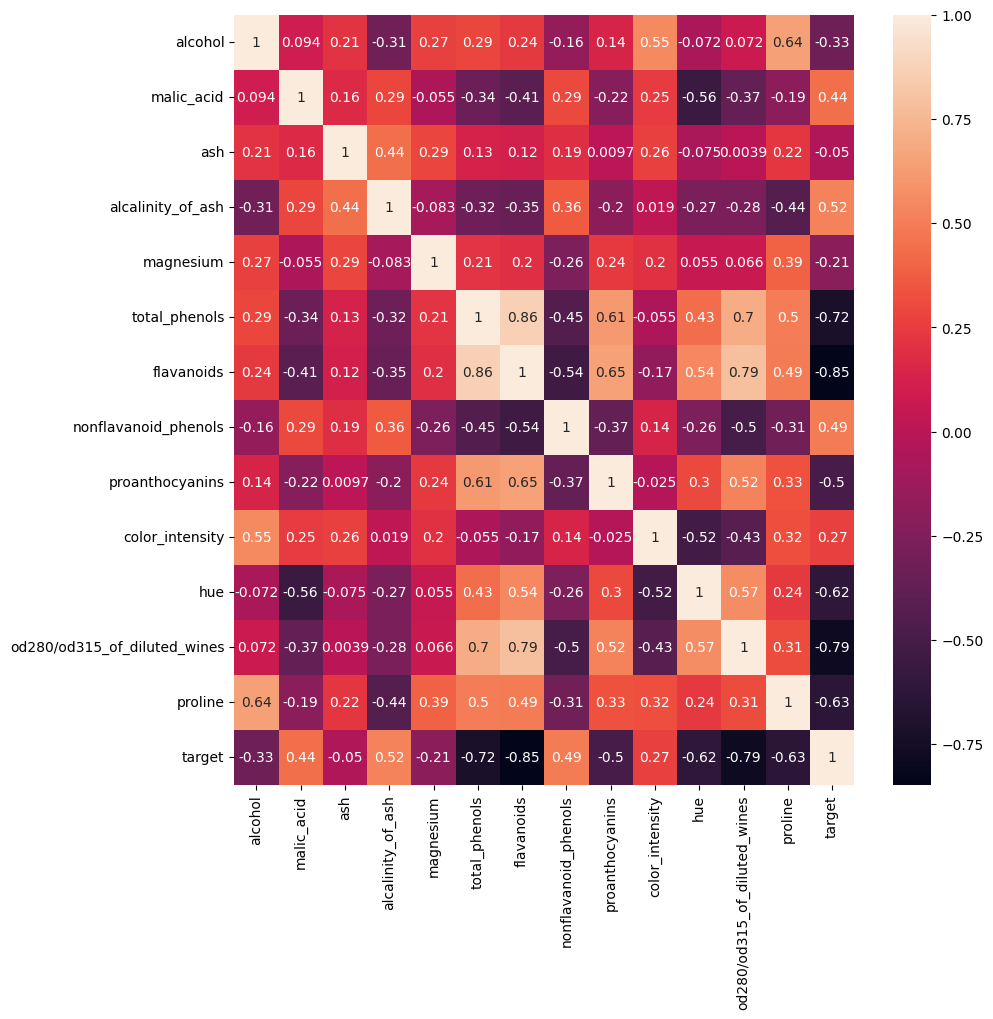

In [19]:
plt.figure(figsize=(10,10))
sns.heatmap(df_wine.corr(), annot=True)

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import Normalizer
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [21]:
X = df_wine.drop('target', axis=1)
y = df_wine['target']

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True, random_state=0)

In [24]:
scaler = Normalizer().fit(X_train)
normalized_x_train = scaler.transform(X_train)
normalized_x_test = scaler.transform(X_test)

In [26]:
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor

In [27]:
K=7
knn = KNeighborsClassifier(K)
knn.fit(normalized_x_train, y_train)

KNeighborsClassifier(n_neighbors=7)

In [28]:
y_pred_sklearn=knn.predict(normalized_x_test)

In [29]:
# Acurácia
accuracy_knn = accuracy_score(y_test, y_pred_sklearn)
print(f'Acurácia: {accuracy_knn:.4f}')

Acurácia: 0.8148


In [30]:
from sklearn.naive_bayes import GaussianNB

In [31]:
gnb = GaussianNB()
gnb.fit(normalized_x_train, y_train)

GaussianNB()

In [32]:
y_pred_gnb = gnb.predict(normalized_x_test)

In [33]:
# Acurácia
accuracy_gnb = accuracy_score(y_test, y_pred_gnb)
print(f'Acurácia: {accuracy_gnb:.4f}')

Acurácia: 0.9259


In [34]:
from sklearn.model_selection import cross_val_score

In [35]:
# Validacao cruzada para KNN
knn_scores = cross_val_score(knn, normalized_x_train, y_train, cv=10)
print(f'Pontuações de validação cruzada para KNN: \n{knn_scores}')
print(f'Média das pontuações para KNN: \n{knn_scores.mean():.4f}')

# Validacao cruzada para Naive Bayes
gnb_scores = cross_val_score(gnb, normalized_x_train, y_train, cv=10)
print(f'Pontuações de validação cruzada para Naive Bayes: \n{gnb_scores}')
print(f'Média das pontuações para Naive Bayes: \n{gnb_scores.mean():.4f}')

Pontuações de validação cruzada para KNN: 
[0.69230769 0.84615385 0.76923077 0.92307692 0.83333333 0.83333333
 0.91666667 0.75       0.5        0.83333333]
Média das pontuações para KNN: 
0.7897
Pontuações de validação cruzada para Naive Bayes: 
[0.92307692 0.84615385 0.84615385 1.         0.75       1.
 1.         1.         0.66666667 0.91666667]
Média das pontuações para Naive Bayes: 
0.8949


In [38]:
# Hold-out - acurácias
print("\nAcurácias (Hold-out):")
print(f"KNN: {accuracy_knn:.4f}")
print(f"Naive Bayes: {accuracy_gnb:.4f}")

print("\nAcurácias (K-Fold):")
print(f"KNN: {knn_scores.mean():.4f}")
print(f"Naive Bayes: {gnb_scores.mean():.4f}")

print("\nMétodos de Validação:")
print("Validação Hold-out:")
print("- Vantagens: Simples de implementar, rápido para executar, bom para grandes conjuntos de dados.")
print("- Desvantagens: A acurácia pode variar significativamente dependendo da forma como os dados são divididos (depende do 'random_state'), não utiliza todo o conjunto de dados para treinamento em cada iteração.")

print("\nValidação K-Fold:")
print("- Vantagens: Utiliza todos os dados para treinamento e teste, fornece uma estimativa mais robusta da performance do modelo (menos sensível à divisão específica dos dados), útil para conjuntos de dados menores.")
print("- Desvantagens: Mais complexo de implementar, computacionalmente mais caro (treina o modelo K vezes).")

print("\nConclusões sobre o Desempenho do Modelo:")
print("O modelo Naive Bayes demonstrou melhor desempenho tanto na validação hold-out quanto na K-Fold.")


Acurácias (Hold-out):
KNN: 0.8148
Naive Bayes: 0.9259

Acurácias (K-Fold):
KNN: 0.7897
Naive Bayes: 0.8949

Métodos de Validação:
Validação Hold-out:
- Vantagens: Simples de implementar, rápido para executar, bom para grandes conjuntos de dados.
- Desvantagens: A acurácia pode variar significativamente dependendo da forma como os dados são divididos (depende do 'random_state'), não utiliza todo o conjunto de dados para treinamento em cada iteração.

Validação K-Fold:
- Vantagens: Utiliza todos os dados para treinamento e teste, fornece uma estimativa mais robusta da performance do modelo (menos sensível à divisão específica dos dados), útil para conjuntos de dados menores.
- Desvantagens: Mais complexo de implementar, computacionalmente mais caro (treina o modelo K vezes).

Conclusões sobre o Desempenho do Modelo:
O modelo Naive Bayes demonstrou melhor desempenho tanto na validação hold-out quanto na K-Fold.
